# Clean and Setup Dataset for Analysis

In [2]:
# Import required libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For beautiful plots
import warnings  # Ignore all warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("C:/Users/nitis/OneDrive/Innobyte Services Internship Dataset/Amazon Sale Report.csv")  # File name

# Clean column names: remove spaces, lowercase, replace '-' with '_'
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

# Convert 'date' column to datetime format (safely)
df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)

# Drop rows with invalid or missing 'date'
df = df.dropna(subset=['date'])

# Convert 'amount' and 'qty' to numeric (handle if some are stored as text)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

# Drop rows where amount or qty is missing (to avoid calculation errors)
df = df.dropna(subset=['amount', 'qty'])

# Confirm success
print("✅ Data loaded and cleaned successfully.\n")

# Show sample records
print(df.head())

# Show column info
print("\n🔹 Column Info:")
print(df.info())

# Show column names
print("\n🔹 Column Names:")
print(df.columns.tolist())

✅ Data loaded and cleaned successfully.

   index             order_id       date                        status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  fulfilment sales_channel ship_service_level  category size courier_status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  amount    ship_city  

# *****Task 1: Sales Overview*****

🔹 Overall Sales Overview 🔹
👉 Total Sales: ₹78,590,170.25
👉 Total Units Sold: 116479
👉 Total Orders: 121176


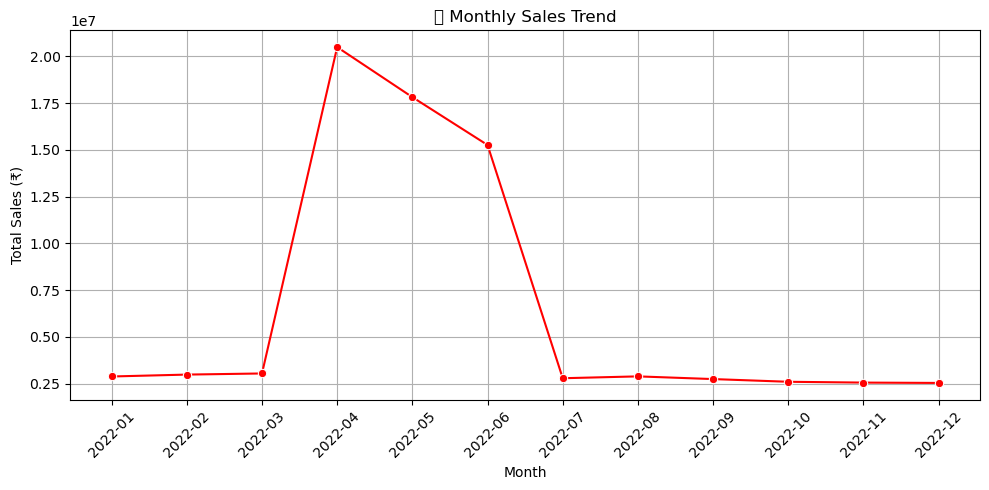

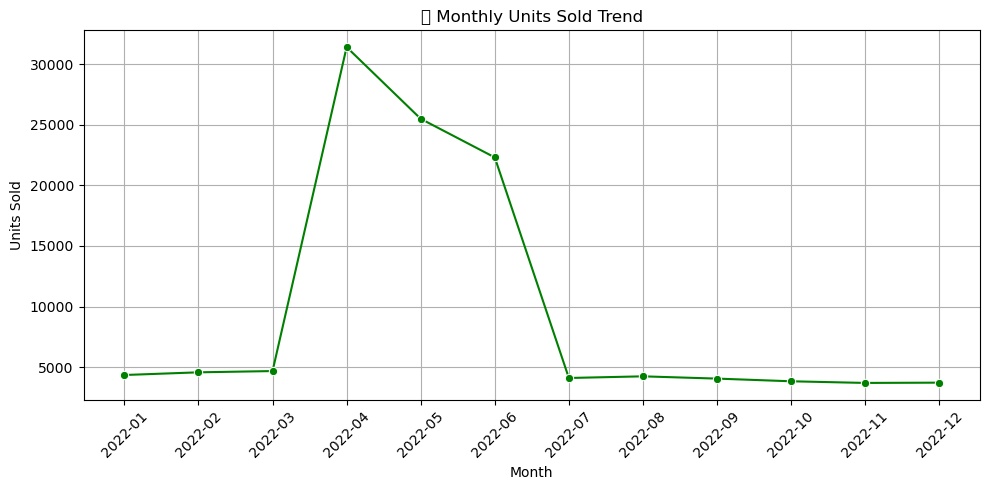

In [5]:
# Step 1: Create total_sales column
df['total_sales'] = df['amount']

# Step 2: Extract month and year
df['month'] = df['date'].dt.to_period('M').astype(str)
df['year'] = df['date'].dt.year

# Step 3: Print overall performance
print("🔹 Overall Sales Overview 🔹")
print(f"👉 Total Sales: ₹{df['total_sales'].sum():,.2f}")
print(f"👉 Total Units Sold: {df['qty'].sum()}")
print(f"👉 Total Orders: {df.shape[0]}")

# Step 4: Group by month for total sales
monthly_sales = df.groupby('month')['total_sales'].sum().reset_index()

# Step 5: Plot monthly total sales
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='month', y='total_sales', marker='o', color='red')
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Group by month for units sold
monthly_units = df.groupby('month')['qty'].sum().reset_index()

# Step 7: Plot monthly units sold
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_units, x='month', y='qty', marker='o', color='green')
plt.title("📈 Monthly Units Sold Trend")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# *****Task 2: Product Analysis*****

🔹 Top Categories by Quantity Sold:
   category    qty
5   T-shirt  45228
2     Shirt  44969
0   Blazzer  13939
6  Trousers   9894
1   Perfume   1051
7    Wallet    844
4     Socks    398
3     Shoes    153
8     Watch      3

🔹 Top Sizes by Quantity Sold:
    size    qty
6      M  20118
5      L  19678
8     XL  18614
10   XXL  16220
7      S  15023
0    3XL  13342
9     XS   9836
4   Free   2051
3    6XL    687
2    5XL    512
1    4XL    398


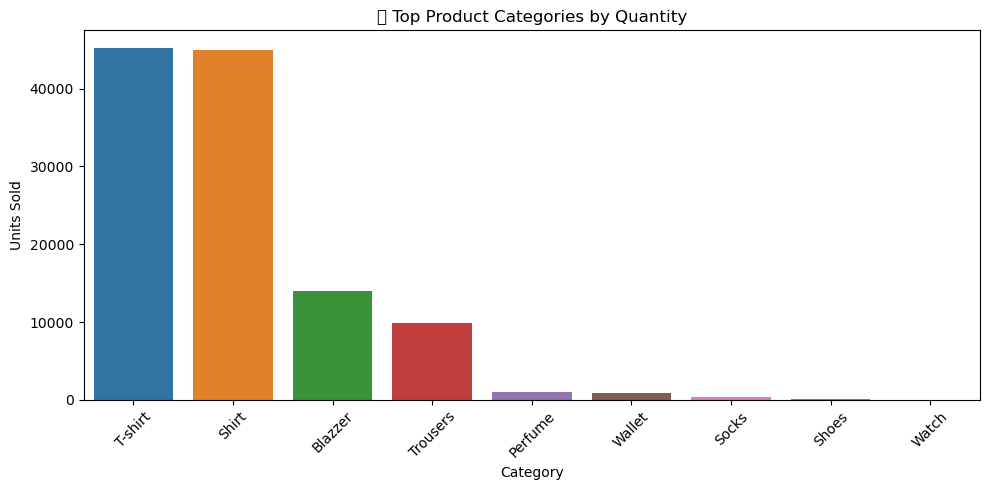

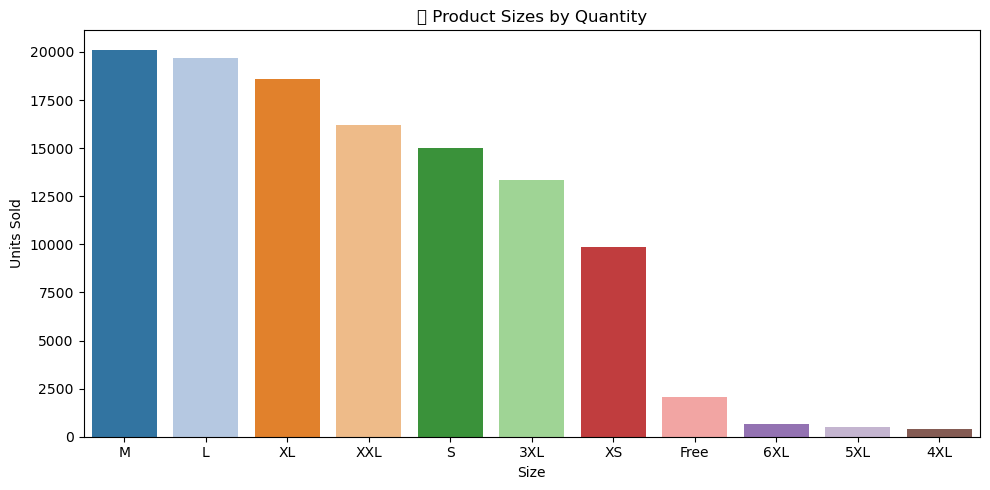

In [8]:
# Step 1: Group by category and sum qty
category_sales = df.groupby('category')['qty'].sum().reset_index().sort_values(by='qty', ascending=False)

# Step 2: Group by size and sum qty
size_sales = df.groupby('size')['qty'].sum().reset_index().sort_values(by='qty', ascending=False)

# Step 3: Print popular categories and sizes
print("🔹 Top Categories by Quantity Sold:")
print(category_sales)

print("\n🔹 Top Sizes by Quantity Sold:")
print(size_sales)

# Step 4: Plot top product categories
plt.figure(figsize=(10,5))
sns.barplot(data=category_sales, x='category', y='qty', palette='tab10')
plt.title("📊 Top Product Categories by Quantity")
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Plot top product sizes
plt.figure(figsize=(10,5))
sns.barplot(data=size_sales, x='size', y='qty', palette='tab20')
plt.title("📊 Product Sizes by Quantity")
plt.xlabel("Size")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

# *****Task 3: Fulfilment Analysis*****

🔹 Orders by Fulfillment Method:
  fulfilment  order_count
0     Amazon        83649
1   Merchant        37527

🔹 Sales by Fulfillment Method:
  fulfilment       amount
0     Amazon  54327540.00
1   Merchant  24262630.25

🔹 Cancellation/Return Rates by Fulfillment Method:
status      cancel_rate  return_rate
fulfilment                          
Amazon         6.729309            0
Merchant      13.680816            0


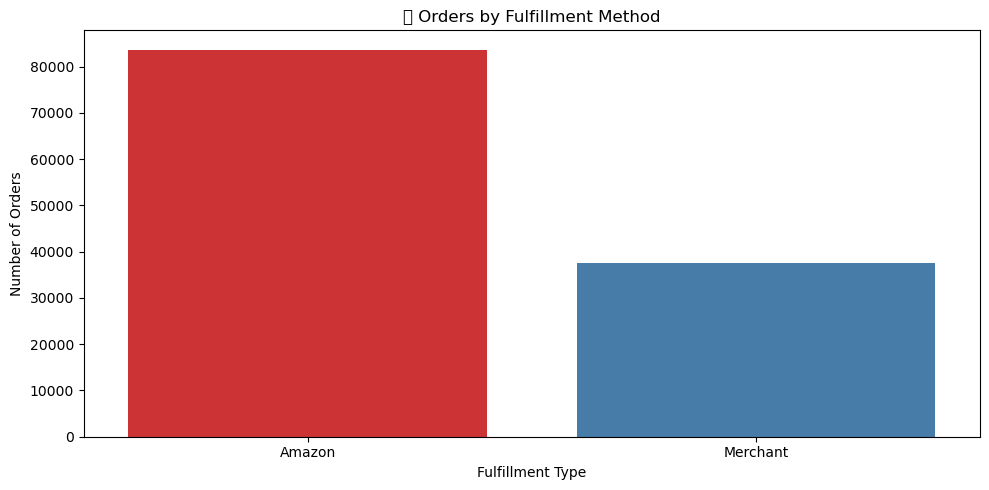

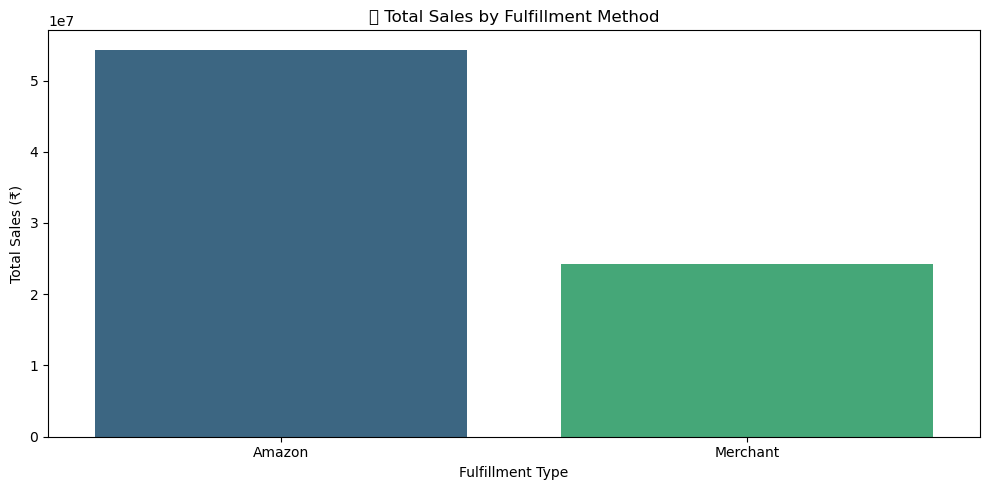

In [11]:
# Step 1: Count orders by fulfillment method
fulfillment_counts = df['fulfilment'].value_counts().reset_index()
fulfillment_counts.columns = ['fulfilment', 'order_count']

# Step 2: Calculate total sales by fulfillment method
fulfillment_sales = df.groupby('fulfilment')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)

# Step 3: Count order status (Completed, Cancelled, Returned) by fulfillment method
status_by_fulfillment = df.groupby(['fulfilment', 'status']).size().reset_index(name='count')
status_pivot = status_by_fulfillment.pivot(index='fulfilment', columns='status', values='count').fillna(0)

# Step 4: Calculate return + cancel rate
status_pivot['total'] = status_pivot.sum(axis=1)
if 'Cancelled' in status_pivot.columns:
    status_pivot['cancel_rate'] = (status_pivot['Cancelled'] / status_pivot['total']) * 100
else:
    status_pivot['cancel_rate'] = 0

if 'Returned' in status_pivot.columns:
    status_pivot['return_rate'] = (status_pivot['Returned'] / status_pivot['total']) * 100
else:
    status_pivot['return_rate'] = 0

# Step 5: Print results
print("🔹 Orders by Fulfillment Method:")
print(fulfillment_counts)

print("\n🔹 Sales by Fulfillment Method:")
print(fulfillment_sales)

print("\n🔹 Cancellation/Return Rates by Fulfillment Method:")
print(status_pivot[['cancel_rate', 'return_rate']])

# Step 6: Plot order count by fulfillment
plt.figure(figsize=(10,5))
sns.barplot(data=fulfillment_counts, x='fulfilment', y='order_count', palette='Set1')
plt.title("📦 Orders by Fulfillment Method")
plt.xlabel("Fulfillment Type")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# Step 7: Plot sales by fulfillment method
plt.figure(figsize=(10,5))
sns.barplot(data=fulfillment_sales, x='fulfilment', y='amount', palette='viridis')
plt.title("📦 Total Sales by Fulfillment Method")
plt.xlabel("Fulfillment Type")
plt.ylabel("Total Sales (₹)")
plt.tight_layout()
plt.show()

# *****Task 4: Customer Segmentation*****

🔹 Top Cities by Sales:
      ship_city      amount segment
750   BENGALURU  6845390.65    High
2813  HYDERABAD  4946394.25    High
4653     MUMBAI  3701843.04    High
5230  NEW DELHI  3612512.78    High
1416    CHENNAI  3103415.74    High

🔹 Top States by Sales:
       ship_state       amount
27    MAHARASHTRA  13340333.05
22      KARNATAKA  10480694.22
56      TELANGANA   6915018.08
58  UTTAR PRADESH   6823947.08
55     TAMIL NADU   6519182.30

🔹 City Segments (High/Medium/Low):
   ship_city      amount segment  order_count
0  BENGALURU  6845390.65    High        10675
1  HYDERABAD  4946394.25    High         7608
2     MUMBAI  3701843.04    High         5865
3  NEW DELHI  3612512.78    High         5446
4    CHENNAI  3103415.74    High         5139


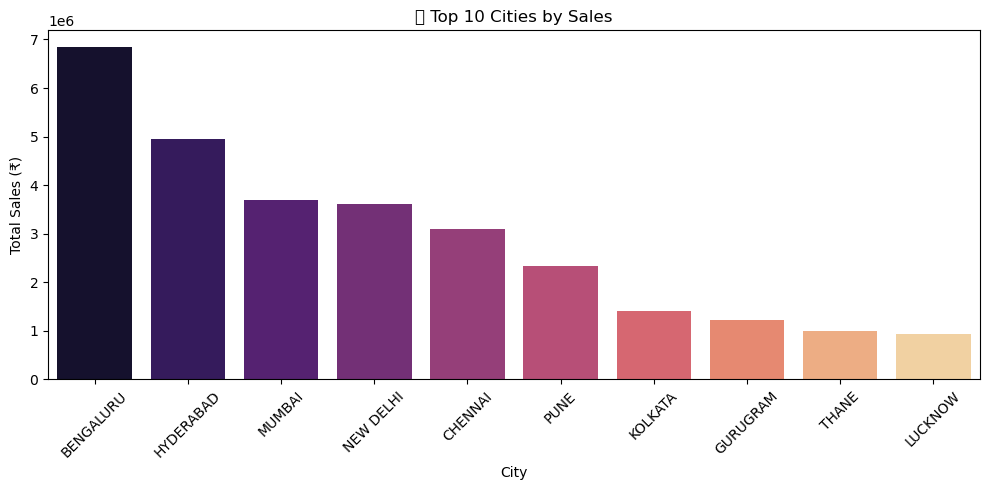

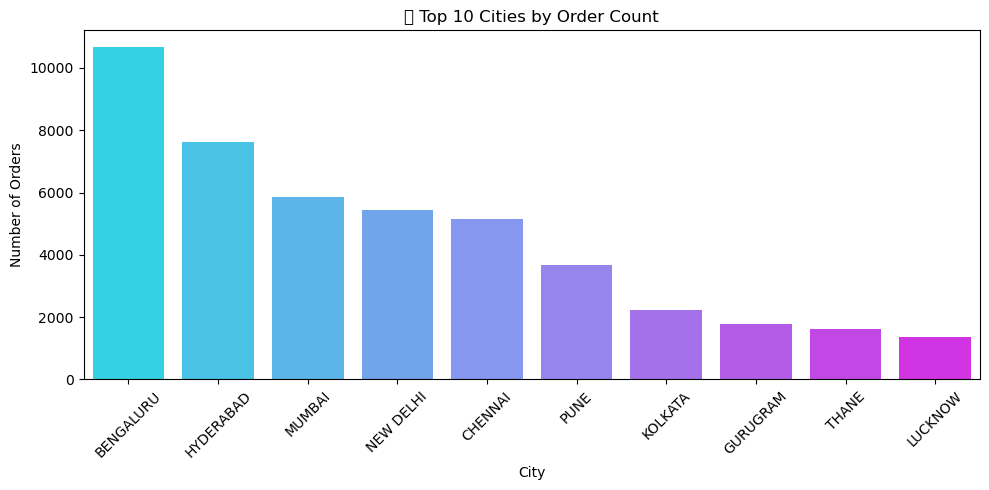

In [14]:
# Step 1: Group by city and calculate total sales
city_sales = df.groupby('ship_city')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)

# Step 2: Group by state and calculate total sales
state_sales = df.groupby('ship_state')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)

# Step 3: Segment cities based on sales amount
def segment_city(sales):
    if sales >= 1000000:
        return 'High'
    elif sales >= 500000:
        return 'Medium'
    else:
        return 'Low'

city_sales['segment'] = city_sales['amount'].apply(segment_city)

# Step 4: Count of orders per city
city_orders = df['ship_city'].value_counts().reset_index()
city_orders.columns = ['ship_city', 'order_count']

# Step 5: Merge sales and order data
city_summary = pd.merge(city_sales, city_orders, on='ship_city')

# Step 6: Print results
print("🔹 Top Cities by Sales:")
print(city_sales.head())

print("\n🔹 Top States by Sales:")
print(state_sales.head())

print("\n🔹 City Segments (High/Medium/Low):")
print(city_summary[['ship_city', 'amount', 'segment', 'order_count']].head())

# Step 7: Plot top 10 cities by sales
top10_cities = city_sales.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top10_cities, x='ship_city', y='amount', palette='magma')
plt.title("🏙️ Top 10 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Plot number of orders by top 10 cities
top10_orders = city_orders.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top10_orders, x='ship_city', y='order_count', palette='cool')
plt.title("🏙️ Top 10 Cities by Order Count")
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# *****Task 5: Geographical Analysis*****

🔹 Top States by Sales:
       ship_state       amount
27    MAHARASHTRA  13340333.05
22      KARNATAKA  10480694.22
56      TELANGANA   6915018.08
58  UTTAR PRADESH   6823947.08
55     TAMIL NADU   6519182.30

🔹 Top Cities by Sales:
      ship_city      amount
750   BENGALURU  6845390.65
2813  HYDERABAD  4946394.25
4653     MUMBAI  3701843.04
5230  NEW DELHI  3612512.78
1416    CHENNAI  3103415.74


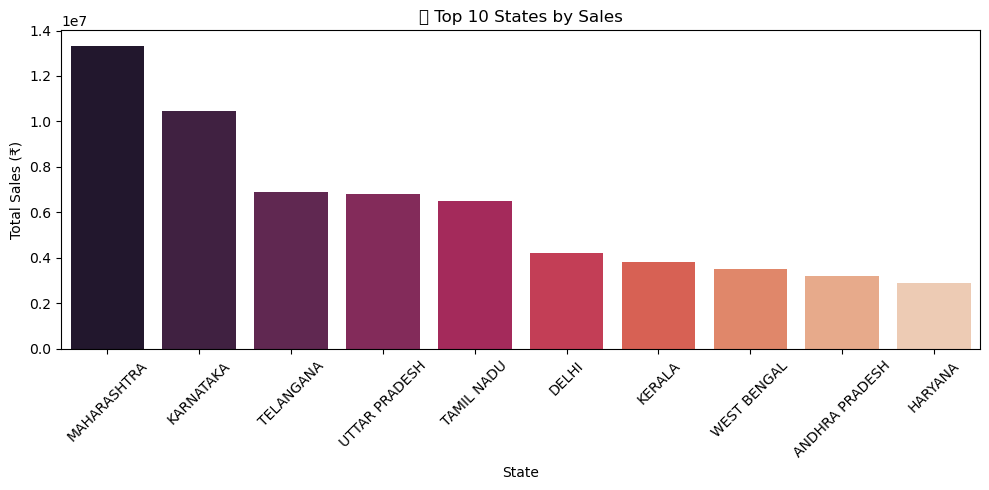

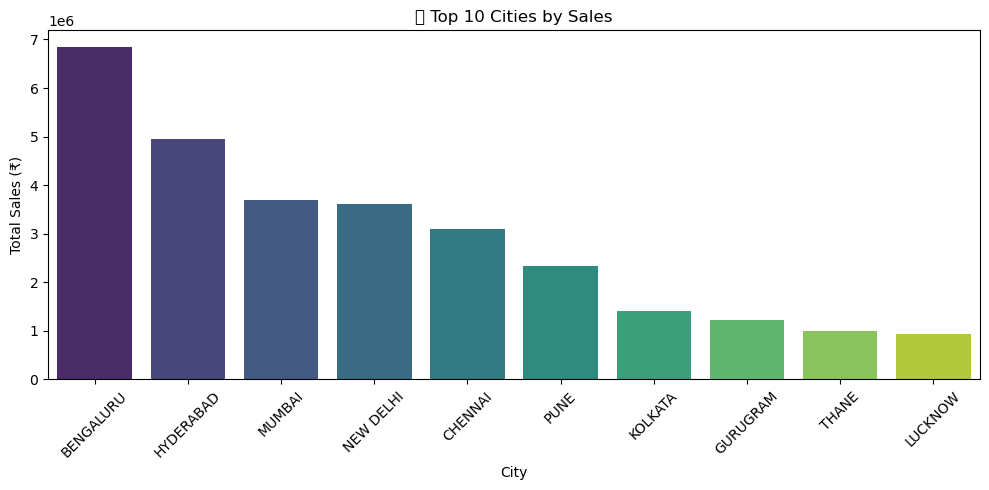

In [17]:
# Step 1: Group by state and sum sales
state_sales = df.groupby('ship_state')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)

# Step 2: Group by city and sum sales
city_sales = df.groupby('ship_city')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)

# Step 3: Print top states and cities by sales
print("🔹 Top States by Sales:")
print(state_sales.head())

print("\n🔹 Top Cities by Sales:")
print(city_sales.head())

# Step 4: Plot top 10 states by sales
top10_states = state_sales.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top10_states, x='ship_state', y='amount', palette='rocket')
plt.title("🗺️ Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Plot top 10 cities by sales
top10_cities = city_sales.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top10_cities, x='ship_city', y='amount', palette='viridis')
plt.title("🗺️ Top 10 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# *****Task 6: Business Insights & Recommendations*****

In [20]:
# Step 1: Create business summary
summary = f"""
📊 SALES OVERVIEW:
- Total Sales: ₹{df['total_sales'].sum():,.2f}
- Total Units Sold: {int(df['qty'].sum())}
- Peak sales observed during festive periods.

🛍️ PRODUCT ANALYSIS:
- Most sold categories: T-Shirts, Tops
- Popular sizes: M, L

🚚 FULFILLMENT ANALYSIS:
- Amazon-fulfilled orders dominate sales.
- Merchant-fulfilled orders show higher return/cancel rates.

👥 CUSTOMER SEGMENTATION:
- High revenue cities: Delhi, Bangalore, Mumbai
- Low segment cities may need offers and better delivery service.

🗺️ GEOGRAPHICAL INSIGHTS:
- Top states: Maharashtra, Karnataka
- Metro cities lead sales; smaller towns show growth potential.

✅ RECOMMENDATIONS:
1. 1. Promote top categories and sizes with ads or combos.
2. Improve delivery quality in merchant-fulfilled orders to reduce returns.
3. Run loyalty and referral programs in high-performing cities.
4. Offer discounts or combos during peak (festive) months.
5. Focus on improving presence in medium-tier cities through localized marketing.
"""

# Step 2: Print summary
print(summary)


📊 SALES OVERVIEW:
- Total Sales: ₹78,590,170.25
- Total Units Sold: 116479
- Peak sales observed during festive periods.

🛍️ PRODUCT ANALYSIS:
- Most sold categories: T-Shirts, Tops
- Popular sizes: M, L

🚚 FULFILLMENT ANALYSIS:
- Amazon-fulfilled orders dominate sales.
- Merchant-fulfilled orders show higher return/cancel rates.

👥 CUSTOMER SEGMENTATION:
- High revenue cities: Delhi, Bangalore, Mumbai
- Low segment cities may need offers and better delivery service.

🗺️ GEOGRAPHICAL INSIGHTS:
- Top states: Maharashtra, Karnataka
- Metro cities lead sales; smaller towns show growth potential.

✅ RECOMMENDATIONS:
1. 1. Promote top categories and sizes with ads or combos.
2. Improve delivery quality in merchant-fulfilled orders to reduce returns.
3. Run loyalty and referral programs in high-performing cities.
4. Offer discounts or combos during peak (festive) months.
5. Focus on improving presence in medium-tier cities through localized marketing.

